In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
exam_df = pd.read_csv('exams.csv')

exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
47,female,group C,some college,standard,none,59,64,53
45,male,group D,some high school,standard,none,75,64,66
36,female,group B,high school,standard,none,53,72,72
58,female,group D,associate's degree,standard,none,68,72,75
35,female,group D,associate's degree,standard,none,68,66,71


In [3]:
exam_df.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.0000
mean,65.880000,69.090000,68.4100
std,15.388754,14.155054,15.0582
min,25.000000,30.000000,27.0000
25%,54.750000,60.250000,57.7500
50%,65.000000,71.000000,71.0000
75%,76.250000,79.000000,80.0000
max,99.000000,100.000000,96.0000


In [4]:
from sklearn import preprocessing

exam_df[['math score']] = preprocessing.scale(exam_df[['math score']].astype('float64'))
exam_df[['reading score']] = preprocessing.scale(exam_df[['reading score']].astype('float64'))
exam_df[['writing score']] = preprocessing.scale(exam_df[['writing score']].astype('float64'))

In [5]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,completed,-0.122783,0.277618,0.172866
1,male,group C,some college,free/reduced,none,-1.559600,-2.278456,-1.829441
2,male,group B,some college,standard,completed,0.269077,-0.432402,-0.694800
3,female,group B,associate's degree,free/reduced,completed,-1.037121,-0.574407,-0.027365
4,female,group B,high school,standard,none,0.595626,1.271647,0.773558


In [6]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,3.077226e-16,-2.087219e-16,2.117750e-16
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.669868e+00,-2.775470e+00,-2.763851e+00
25%,-7.268991e-01,-6.276581e-01,-7.114863e-01
50%,-5.747270e-02,1.356139e-01,1.728658e-01
75%,6.772636e-01,7.036303e-01,7.735578e-01
max,2.163064e+00,2.194673e+00,1.841455e+00


In [7]:
exam_df['parental level of education'].unique()

array(['some college', "associate's degree", 'high school',
       'some high school', "bachelor's degree", "master's degree"],
      dtype=object)

In [8]:
parental_level_of_education = [
    'some college', 
    "associate's degree", 
    'high school',
    'some high school', 
    "bachelor's degree", 
    "master's degree"
]

In [9]:
label_encoding = preprocessing.LabelEncoder()

In [10]:
label_encoding = label_encoding.fit(parental_level_of_education)

In [11]:
exam_df['parental level of education'] = \
    label_encoding.transform(exam_df['parental level of education'].astype(str))

In [12]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,4,standard,completed,-0.122783,0.277618,0.172866
1,male,group C,4,free/reduced,none,-1.559600,-2.278456,-1.829441
2,male,group B,4,standard,completed,0.269077,-0.432402,-0.694800
3,female,group B,0,free/reduced,completed,-1.037121,-0.574407,-0.027365
4,female,group B,2,standard,none,0.595626,1.271647,0.773558


In [13]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [14]:
exam_df = pd.get_dummies(exam_df, columns=['race/ethnicity'])

exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,4,standard,completed,-0.122783,0.277618,0.172866,0,0,1,0,0
1,male,4,free/reduced,none,-1.559600,-2.278456,-1.829441,0,0,1,0,0
2,male,4,standard,completed,0.269077,-0.432402,-0.694800,0,1,0,0,0
3,female,0,free/reduced,completed,-1.037121,-0.574407,-0.027365,0,1,0,0,0
4,female,2,standard,none,0.595626,1.271647,0.773558,0,1,0,0,0


In [15]:
exam_df = pd.get_dummies(exam_df, columns=['gender',
                                          'lunch',
                                          'test preparation course'])

exam_df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,4,-0.122783,0.277618,0.172866,0,0,1,0,0,1,0,0,1,1,0
1,4,-1.559600,-2.278456,-1.829441,0,0,1,0,0,0,1,1,0,0,1
2,4,0.269077,-0.432402,-0.694800,0,1,0,0,0,0,1,0,1,1,0
3,0,-1.037121,-0.574407,-0.027365,0,1,0,0,0,1,0,1,0,1,0
4,2,0.595626,1.271647,0.773558,0,1,0,0,0,1,0,0,1,0,1


In [16]:
from sklearn.model_selection import train_test_split

X = exam_df.drop('math score', axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [18]:
print("Training_score : ", linear_model.score(x_train, y_train))

Training_score :  0.9016395191888478


In [19]:
y_pred = linear_model.predict(x_test)

In [20]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.7846719871826726


In [21]:
linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

In [22]:
print("Training_score : ", linear_model.score(x_train, y_train))

Training_score :  0.9016395191888478


In [23]:
y_pred = linear_model.predict(x_test)

In [24]:
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.7846719871826823


In [25]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
96,-0.596524,-0.841191
7,0.583657,0.987486
34,-1.057821,-0.645262
94,0.592081,0.595626
88,0.956071,0.987486
17,-1.061271,-0.710572
29,0.281694,0.726246
32,-0.080468,0.269077
57,0.545403,0.595626
33,0.630294,0.269077


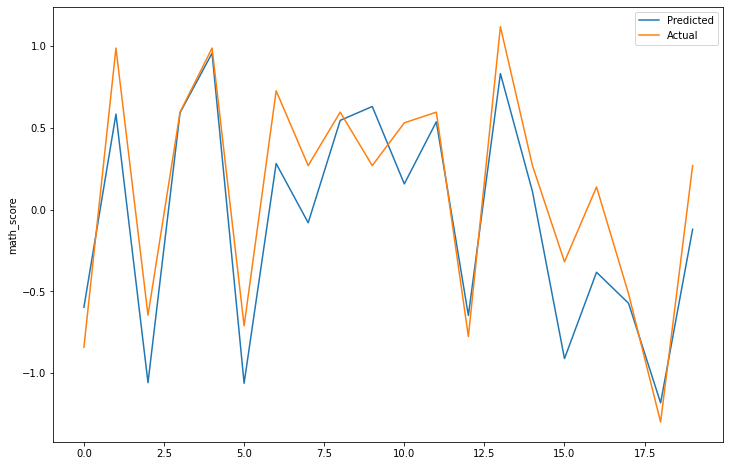

In [26]:
plt.figure(figsize=(12,8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('math_score')

plt.legend()
plt.show()

In [27]:
X = exam_df.drop(['math score','writing score', 'reading score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training_score : ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))


Training_score :  0.15795818817353213
Testing_score :  0.3576140380122165


In [28]:
X = exam_df.drop(['math score','writing score'], axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
print("Training_score : ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.8896214814248858
Testing_score :  0.7551986698619849
